<a href="https://colab.research.google.com/github/GithmiHashara/ScoreCast/blob/main/Score_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
data = {
    "Hours_Studied": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Score":[10, 20, 30, 40, 50, 60, 65, 75, 85, 95]
}
df = pd.DataFrame(data)

In [5]:
X = np.array(df["Hours_Studied"]).reshape(-1, 1)
y = np.array(df["Score"]).reshape(-1, 1)

In [6]:
X = X.astype(np.float32)
y = y.astype(np.float32)

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,), use_bias=True)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='mean_squared_error',
    metrics=['mae']
)

In [10]:
print("Training the model...")
history = model.fit(X, y, epochs=2000, verbose=0)

Training the model...


In [11]:
predicted = model.predict(X, verbose=0)

In [12]:
final_loss = history.history['loss'][-1]
print(f"Final training loss: {final_loss:.4f}")

Final training loss: 13.8191


In [14]:
weights, bias = model.get_weights()
print(f"Model equation: Score = {weights[0][0]:.2f} * Hours + {bias[0]:.2f}")

Model equation: Score = 8.06 * Hours + 8.93


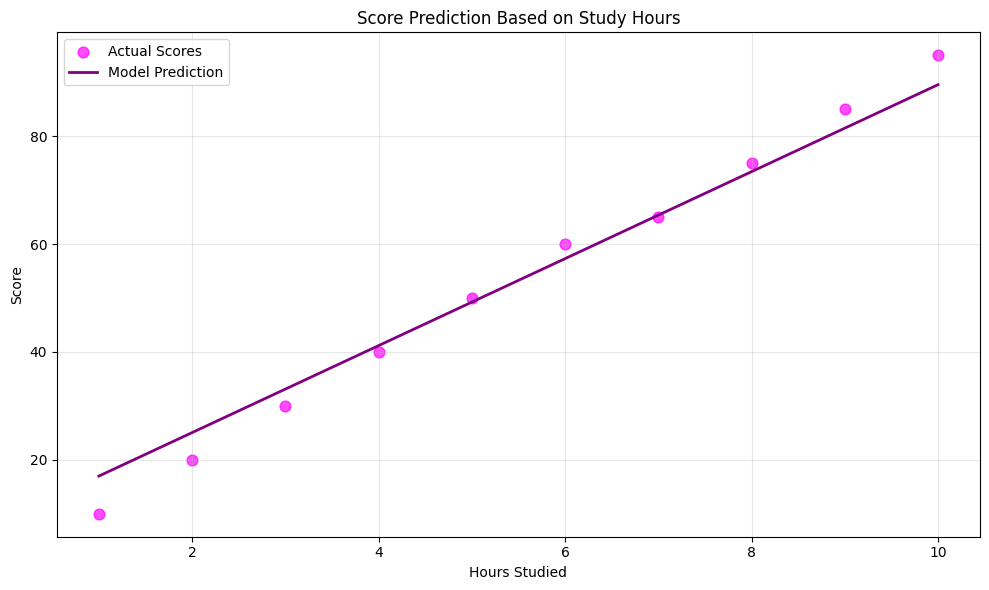

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='magenta', label= 'Actual Scores ', s=60, alpha=0.7)
plt.plot(X, predicted, color='purple', linewidth=2, label='Model Prediction')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.title('Score Prediction Based on Study Hours')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [21]:
print("\nPredictions vs Actual:")
for i in range(len(X)):
  print(f"Hours: {X[i][0]:.0f}, Actual: {y[i][0]:.0f}, Predicted: {predicted[i][0]:.1f}")



Predictions vs Actual:
Hours: 1, Actual: 10, Predicted: 17.0
Hours: 2, Actual: 20, Predicted: 25.1
Hours: 3, Actual: 30, Predicted: 33.1
Hours: 4, Actual: 40, Predicted: 41.2
Hours: 5, Actual: 50, Predicted: 49.2
Hours: 6, Actual: 60, Predicted: 57.3
Hours: 7, Actual: 65, Predicted: 65.4
Hours: 8, Actual: 75, Predicted: 73.4
Hours: 9, Actual: 85, Predicted: 81.5
Hours: 10, Actual: 95, Predicted: 89.5


In [22]:
ss_res = np.sum((y - predicted) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (ss_res / ss_tot)
print(f"\nR-squared: {r_squared:.4f}")


R-squared: 0.9806
